In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


트레이닝을 먼저 시킨다. cifar10은 되게 유명한 모델이다. 이 데이터 셋 알고리즘이 다 오픈되어있다.

기본적으로레이닝을 먼저 시킨다. cifar10은 되게 유명한 모델이다. 이 데이터 셋 알고리즘이 다 오픈되어있다.

기본적으로 cifar10에 있는 자료를 keras.datasets에서 가져오게한다. 트레인과 테스트로 나눈다. 이걸 그대로 옮겨가져온다.


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

<Figure size 720x720 with 0 Axes>

10개의 레이블을 제공해 이미지를 분류하려 한다.



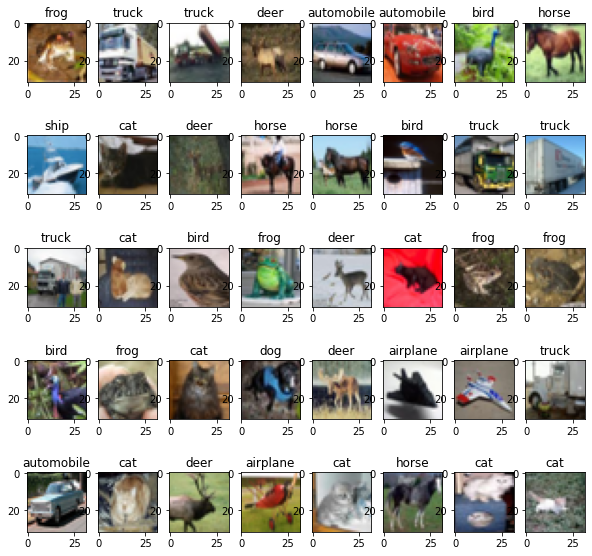

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)
plt.show()
X_train

여기까지가 기본적으로 트레이닝 된 것을 보여준다. 이정도면 인터넷의 있는 데이터를 잘 긁어왔음을 알 수 있다.

이제 다른것을 트레이닝 시켜보자. 

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout


위의 사이퍼를 그대로 긁어와 쓰겠다.
즉 나는 이미지를 올리지도 않았는데, 케라스에서 자동으로 데이터셋의 cifar10을 찾아서 가져온다.

In [ ]:
num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

Rows와 Cols를 지정한다.

In [ ]:
# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)  

각각을 트레인시키겠다. 지금은 시퀀셜을 스겠다.

In [ ]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

모델컴파일하기 위해서 요소들 집어넣고,시퀀셜 카테고리 분리한다. 
categorical_crossentropy 써서 loss잡고 adam함수쓰고 실제 metrics로 정확도를 판단하겠다이다.

In [ ]:
# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50, #배치사이즈 에포크가 너무많으면 하루가넘게걸리기도한다. 50정도가 적정수치인데. 그렇다고 배치사이즈를 1로하면 의미없으니 32가 적당하다.
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8994 - accuracy: 0.3273 - val_loss: 1.7492 - val_accuracy: 0.3740
Epoch 2/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.7190 - accuracy: 0.3837 - val_loss: 1.6693 - val_accuracy: 0.4091
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6551 - accuracy: 0.4071 - val_loss: 1.6191 - val_accuracy: 0.4238
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6182 - accuracy: 0.4215 - val_loss: 1.6047 - val_accuracy: 0.4271
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5914 - accuracy: 0.4333 - val_loss: 1.6274 - val_accuracy: 0.4237
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5699 - accuracy: 0.4382 - val_loss: 1.5821 - val_accuracy: 0.4319
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5537 - accuracy: 0.4453 - val_loss: 1.5588 -

히스토그램으로 보여주는 것이다. 
한 에포크 배치가 1563개이고 그걸 다 돌린다. 


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

313/313 [==============================] - 1s 5ms/step - loss: 1.5371 - accuracy: 0.4574
정답률= 0.45739999413490295 loss= 1.5371392965316772


모델학습을 시켰으니 이제 평가해야한다.
평가하기가 끝나면 그래프를 그려야한다.

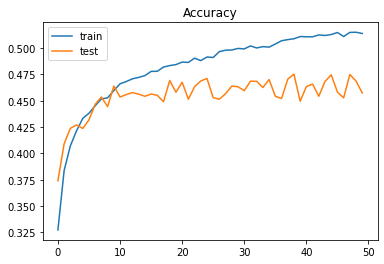

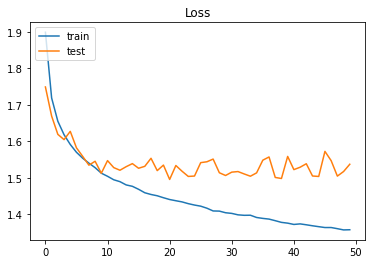

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


학습된 모델을 평가한뒤 그래프를 그리는 코드

In [ ]:
#모델 저장하기
model.save_weights('cifar10-weight.h5')

import cv2
import numpy as np


모델을 저장한다. cifat10의 가중치 준것을 저장한다. 위의 코드와 연속성을 갖기위해 일단 중간저장을 한다. h5이름으로 !

모델을 불러와서 적합하게 분류할 것이다.
cv2와 numpy를 불러온다.

In [ ]:
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

레이블은 아까 정보 그대로, 처음 트레이닝 시킬때 레이블 그대로 한번 더 가지고 온다. 

In [ ]:
# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

모델을 가져온다.

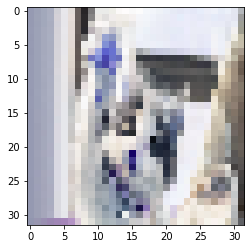

1/1 [==============================] - 0s 18ms/step


In [ ]:
# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('cat1.jpg')
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]

오픈시비를 이용해서 이미지를 불러드린다. im2로 받음.

그리고 머신러닝을 이용해서 학습된 이미지를 다음 코드실행을 위해 데이터 형태를 맞추어준다.

In [ ]:
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])



airplane = 22
automobile = 0
bird = 51
cat = 8
deer = 8
dog = 3
frog = 0
horse = 2
ship = 0
truck = 1
---
예측한 결과= bird
